## Objective
1. Perform EDA to find key insights
2. Use various ML algos to predict the response variables
3. Perform a predictive task of classification to predict whether an individual makes over 50k a year or less using different ML algorithms.

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
from itertools import combinations
from collections import OrderedDict

warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## What are we doing?
1. Importing the libraries
2. EDA (Exploratory Data Analysis)
   - Basic EDA, such as shape, info, encodings
3. Summary statistics (for numeric and categorical attributes)
4. Univariate analysis (one column)
    - plot and describe its distribution
5. discover the relationship between capital-gain and capital-loss (capital_change)
6. Bivariate analysis (income + all other numeric columns)
    - plot and describe its distribution
    - Prove the description via Hypothesis testing
    - We will make the final conclusions
    - Hypothesis testing will be done with a 2 sample t-test.
7. We will go throught the same process for the categorical columns
    - Hypothesis testing will be done using the chi-square test:
         * We will have a contingency table, to check the relationship between variables.
         * Then we will calculate the degree of freedom, p-value, and the expected frequency
         * We will end with the calculation of criticial-value (CV)
         * We will compare the test stat with the CV, and if test-stat>CV, then the variables are dependent.
8. Multivariate Analysis
9. Making new variables
   - We will make the variable 'capital_change' and then use hypothesis testing to check the relationship between income and the 'capital_change' column.
10. After EDA, we will perform feature selection
    - simply cleaning the data
11. Finally, we will build the models, and compare them.

In [156]:
data = pd.read_csv('../data/adult.csv',na_values='?') #Convert the '?' entries to null values
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## A description of the data
- **age**: the age of an individual.
    - age$\in\mathcal{I}\:[17,90]$
    
    
* **workclass**: The type of work or employment of an individual. It can have the following categories:
    - `workclass` $\in \mathcal{C}\:$
    - `['Private', 'Local-gov','Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']`
        - Private: Working in the private sector.
        - Self-emp-not-inc: Self-employed individuals who are not incorporated.
        - Self-emp-inc: Self-employed individuals who are incorporated.
        - Federal-gov: Working for the federal government.
        - Local-gov: Working for the local government.
        - State-gov: Working for the state government.
        - Without-pay: Not working and without pay.
        - Never-worked: Never worked before.

    
- **fnlwgt/Final Weight**: *The weights on the CPS files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly by Population Division at the Census Bureau. They use 3 sets of controls.
    - `fnlwgt`$\in \mathcal{I}\:[12285,1490400]$
        - A single cell estimate of the population 16+ for each state.
        - Controls for Hispanic Origin by age and sex.
        - Controls by Race, age and sex.
    
* **education**: The highest level of education completed.
    - `education` $\in\:\mathcal{C}$
    - `['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']`
- **education-num**: The number of years of education completed.
    - `educational-num` $\in\mathcal{I}\:[1,16]$
* **marital-status**: The marital status.
    - `marital-status`$\in\:\mathcal{C}$
    - `['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse']`
- **occupation**: Type of work performed by an individual.
    - `occupation`$\in\:\mathcal{C}$
    - `['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']`
* **relationship**: The relationship status.
    - `relationship`$\in\:\mathcal{C}$
    - `['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative']`
- **race**: The race of an individual.
    - `race`$\in\:\mathcal{C}$
    - `['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo']`
* **gender**: The gender of an individual.
    - `gender`$\in\:\mathcal{C}$
    - `['Male','Female']`
- **capital-gain**: The amount of capital gain (financial profit).
    - `capital-gain` $\in\:\mathcal{I}\:[0,99999]$
* **capital-loss**: The amount of capital loss an individual has incurred.
    - `capital-loss` $\in\:\mathcal{I}\:[0,4356]$
- **hours-per-week**: The number of hours works per week.
    - `hours-per-week` $\in\:\mathcal{I}\:[1,99]$
* **native-country**: The country of origin or the native country.
    - `native-country`$\in\:\mathcal{C}$
    - `['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands']`
- **income**: The income level of an individual and serves as the target variable. It indicates whether the income is greater than 50,000 dollars or less than or equal to 50,000 dolars denoted as (>50K, <=50K).
     - `income`$\in\:\mathcal{C}$ `['<=50K', '>50K']`

    
\* -> We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

## Renaming the columns

In [157]:
data.rename(columns={
           'workclass':'workClass',
           'fnlwgt':'finalWeight',
           'educational-num':'Nof_yrsEducation',
           'marital-status':'maritalStatus',
            'capital-gain':'capitalGain',
            'capital-loss':'capitalLoss',
            'hours-per-week':'Nof_hrspweek',
            'native-country':'nativeCountry'},inplace=True)
data.head()

,age,workClass,finalWeight,education,Nof_yrsEducation,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,Nof_hrspweek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## Exploratory Data Analysis

In [4]:
data.shape #48842,15

(48842, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               48842 non-null  int64 
 1   workClass         46043 non-null  object
 2   finalWeight       48842 non-null  int64 
 3   education         48842 non-null  object
 4   Nof_yrsEducation  48842 non-null  int64 
 5   maritalStatus     48842 non-null  object
 6   occupation        46033 non-null  object
 7   relationship      48842 non-null  object
 8   race              48842 non-null  object
 9   gender            48842 non-null  object
 10  capitalGain       48842 non-null  int64 
 11  capitalLoss       48842 non-null  int64 
 12  Nof_hrspweek      48842 non-null  int64 
 13  nativeCountry     47985 non-null  object
 14  income            48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
pd.isnull(data).sum()

age                    0
workClass           2799
finalWeight            0
education              0
Nof_yrsEducation       0
maritalStatus          0
occupation          2809
relationship           0
race                   0
gender                 0
capitalGain            0
capitalLoss            0
Nof_hrspweek           0
nativeCountry        857
income                 0
dtype: int64

In [158]:
# filling in the NaN values

data.fillna(value={
    'workClass':data.workClass.mode()[0],
    'occupation':data.occupation.mode()[0],
    'nativeCountry':data.nativeCountry.mode()[0]
},inplace=True)

data.isnull().sum()

age                 0
workClass           0
finalWeight         0
education           0
Nof_yrsEducation    0
maritalStatus       0
occupation          0
relationship        0
race                0
gender              0
capitalGain         0
capitalLoss         0
Nof_hrspweek        0
nativeCountry       0
income              0
dtype: int64

In [423]:
#in case there are null values, they would be dropped as :
# data = data.dropna()

## Descriptive Statistics

In [159]:
# income will not be considered as it's the final target variable
# educational_number will be dropped as well, as it doesnt contributes very little information

data.drop(columns=['Nof_yrsEducation'],inplace=True)
data.describe()

,age,finalWeight,capitalGain,capitalLoss,Nof_hrspweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [133]:
# descriptive stats for the categorical vars

data.describe(include='object')

,workClass,education,maritalStatus,occupation,relationship,race,gender,nativeCountry,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


#### Numerical attributes

* finalWeight
    - it is rightskewed (50% of samples are fall below the mean)

- Nof_hrspweek
    - avg working hours is 40hrs/week
    - 75% of people spend 45 hours and less
    - IQR value is very low, as compared to range--> 50% of observations are between 40 to 45 hours
    - the data is sparse
    - the data is approximately symmetric

#### Categorical attributes 

* nativeCountry
    - it has the most unique values
    - it is heavily biased toward the US (~91%)

- occupation
    - seemingly uniformly distributed

* race
    - also heavily biased towards whites (~85%)

- workClass
    - biased toward private sector employees (~75%)
    
* gender
    - moderately biased towards male (~66%)

## Univariate Analysis

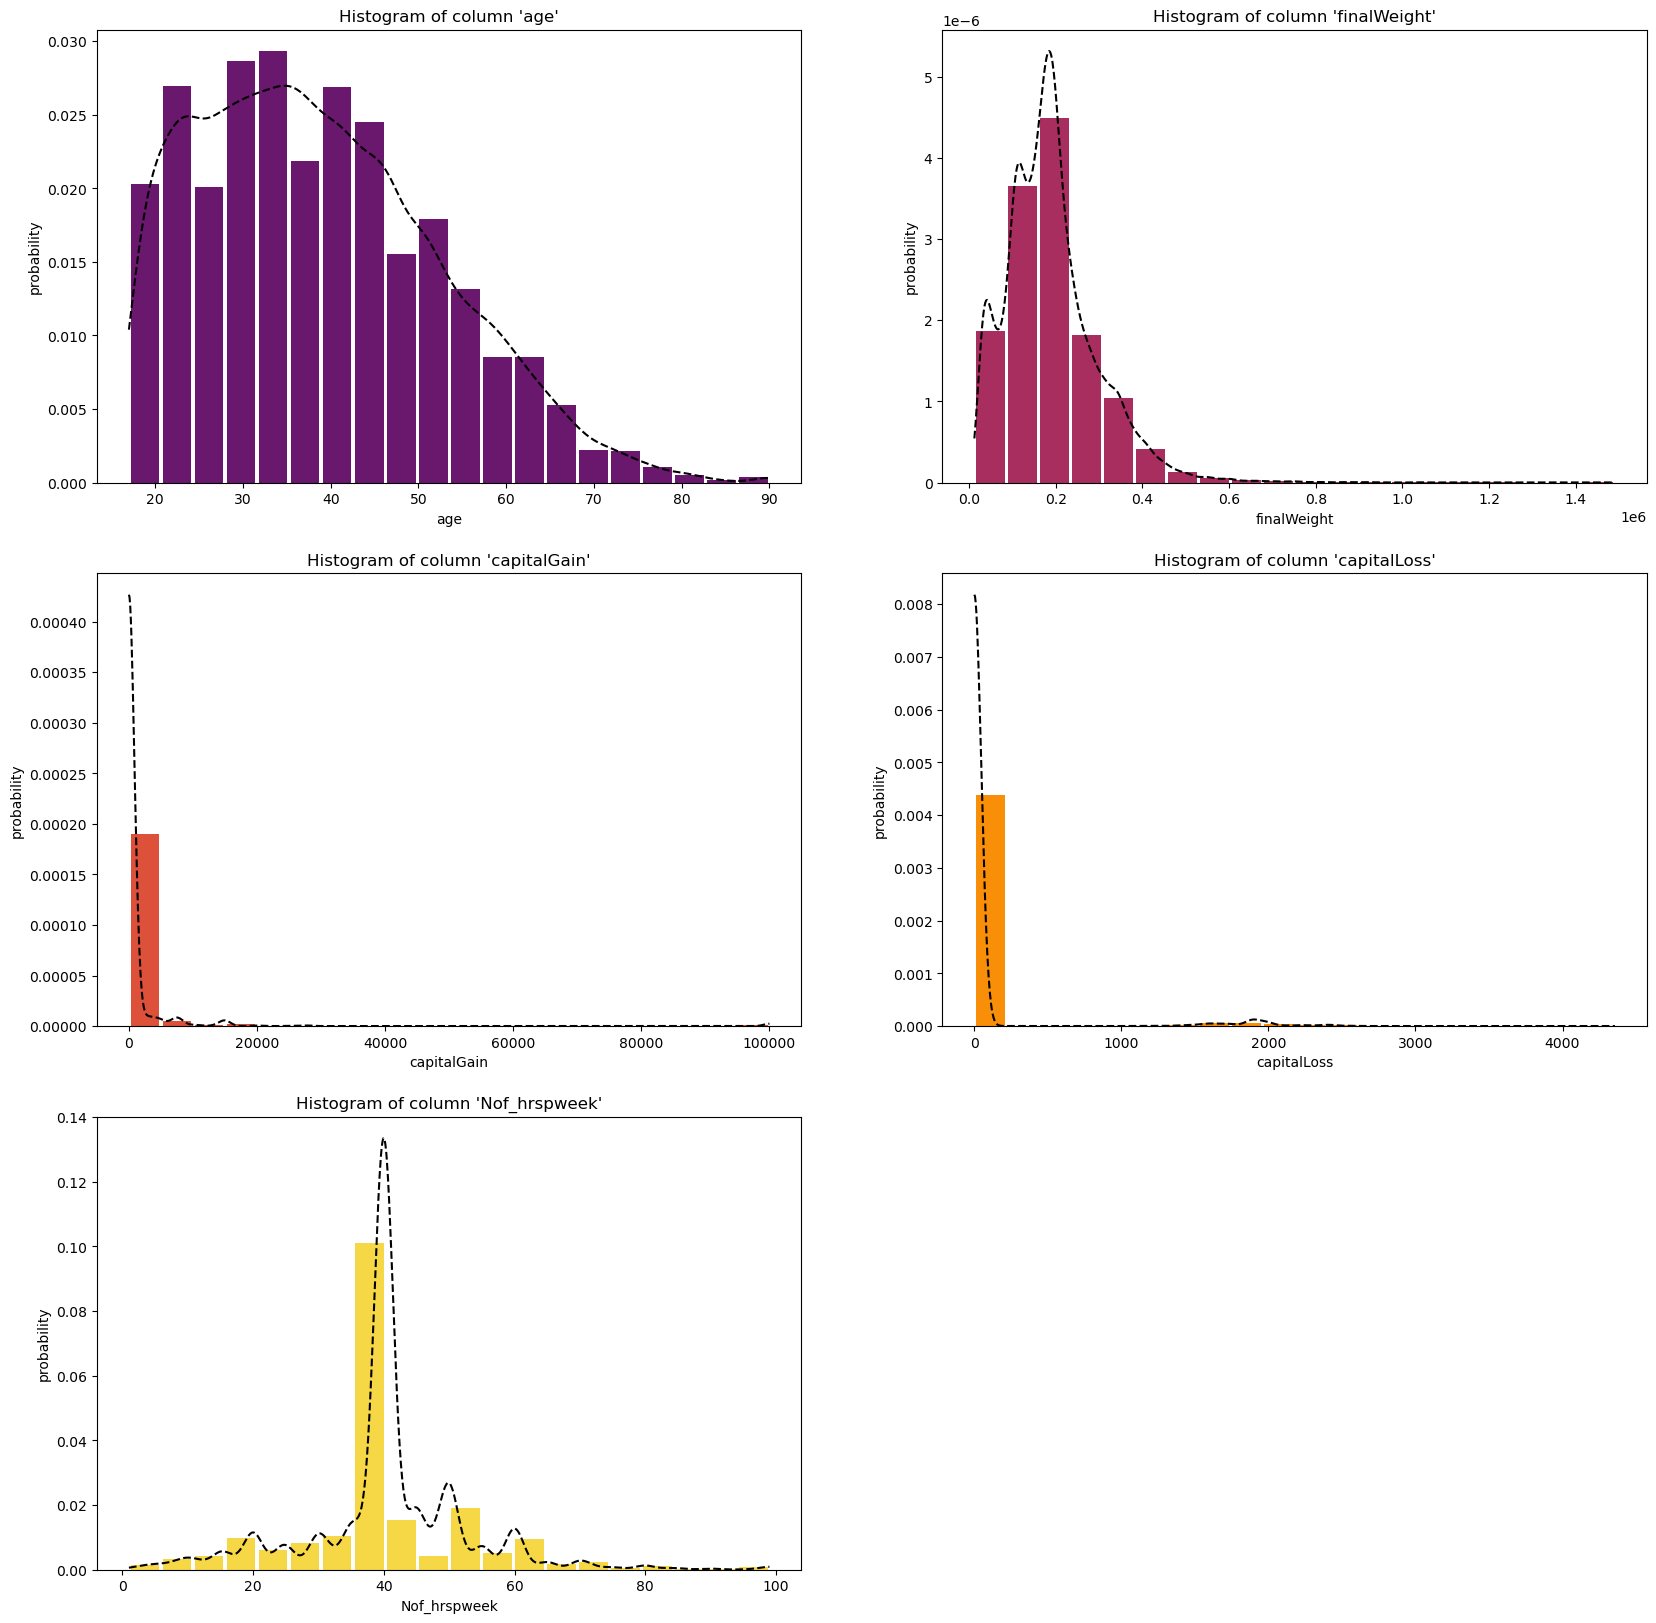

In [19]:
# histograms for numerical attributes

Axdict = plt.figure(figsize=(20,20)).subplot_mosaic(mosaic =[['A','B'],['C','D'],['E','.']])
axs = 'A B C D E'.split()
cmap = mpl.colormaps['inferno'](np.linspace(.3,.9,5))


for i,col in enumerate(data.select_dtypes(include=np.number).columns):
    gkde = stats.gaussian_kde(data[col])
    x = np.linspace(data[col].min(),data[col].max(),1000)

    Axdict[axs[i]].hist(data[col],bins=20,rwidth=.9,color=cmap[i],density=True)
    Axdict[axs[i]].plot(x,gkde.pdf(x),ls='--',color='k')
    Axdict[axs[i]].set_xlabel(col)
    Axdict[axs[i]].set_ylabel('probability')
    Axdict[axs[i]].set_title(f'Histogram of column \'{col}\'')
    

In [1]:
# histograms for numerical attributes

Axdict = plt.figure(figsize=(20,20)).subplot_mosaic(mosaic =[['A','B'],['C','D'],['E','.']])
axs = 'A B C D E'.split()
cmap = mpl.colormaps['inferno'](np.linspace(.3,.6,10))


for i,col in enumerate(data.select_dtypes(include=np.number).columns):
    M50 = data[data.income=='>50K'][[col]]
    L50 = data[data.income=='<=50K'][[col]]
    Axdict[axs[i]].boxplot(M50,positions=[1],
                           boxprops={'ls':'--','lw':1,'c':cmap[i]},
                           meanprops={'marker':'o','markerfacecolor':cmap[i],'markeredgecolor':'w'},
                           medianprops={'ls':'-.','lw':2,'c':'k'},
                           flierprops={'marker':'.','markeredgecolor':'w','markerfacecolor':'k'},
                           showmeans=True,meanline=False)
    Axdict[axs[i]].boxplot(L50,positions=[2],
                           boxprops={'ls':'--','lw':1,'c':cmap[i+5]},
                           meanprops={'marker':'o','markerfacecolor':cmap[i+5],'markeredgecolor':'w'},
                           medianprops={'ls':'-.','lw':2,'c':'k'},
                           flierprops={'marker':'.','markeredgecolor':'w','markerfacecolor':'k'},
                           showmeans=True,meanline=False)
    Axdict[axs[i]].annotate(f'{M50.quantile(.50)[0]}',
                xy=(1.1,M50.quantile(.50)), xycoords='data',
                xytext=(1,1), textcoords='offset points')
    
    Axdict[axs[i]].annotate(f'{L50.quantile(.50)[0]}',
                xy=(2.1,L50.quantile(.50)), xycoords='data',
                xytext=(1,1), textcoords='offset points')
    
    Axdict[axs[i]].set_ylabel(col)
    Axdict[axs[i]].set_xticks([1,2])
    Axdict[axs[i]].set_xticklabels(['>50K','<=50K'])
    Axdict[axs[i]].set_title(f'Histogram of column \'{col}\'')
    

NameError: name 'plt' is not defined

* The age barplot shows a larger IQR for salaries less than 50K, but smaller for salaries >50K
* as can be seen, the median age for people earning greater than 50K is 43, but only 34 for people earning <=50K

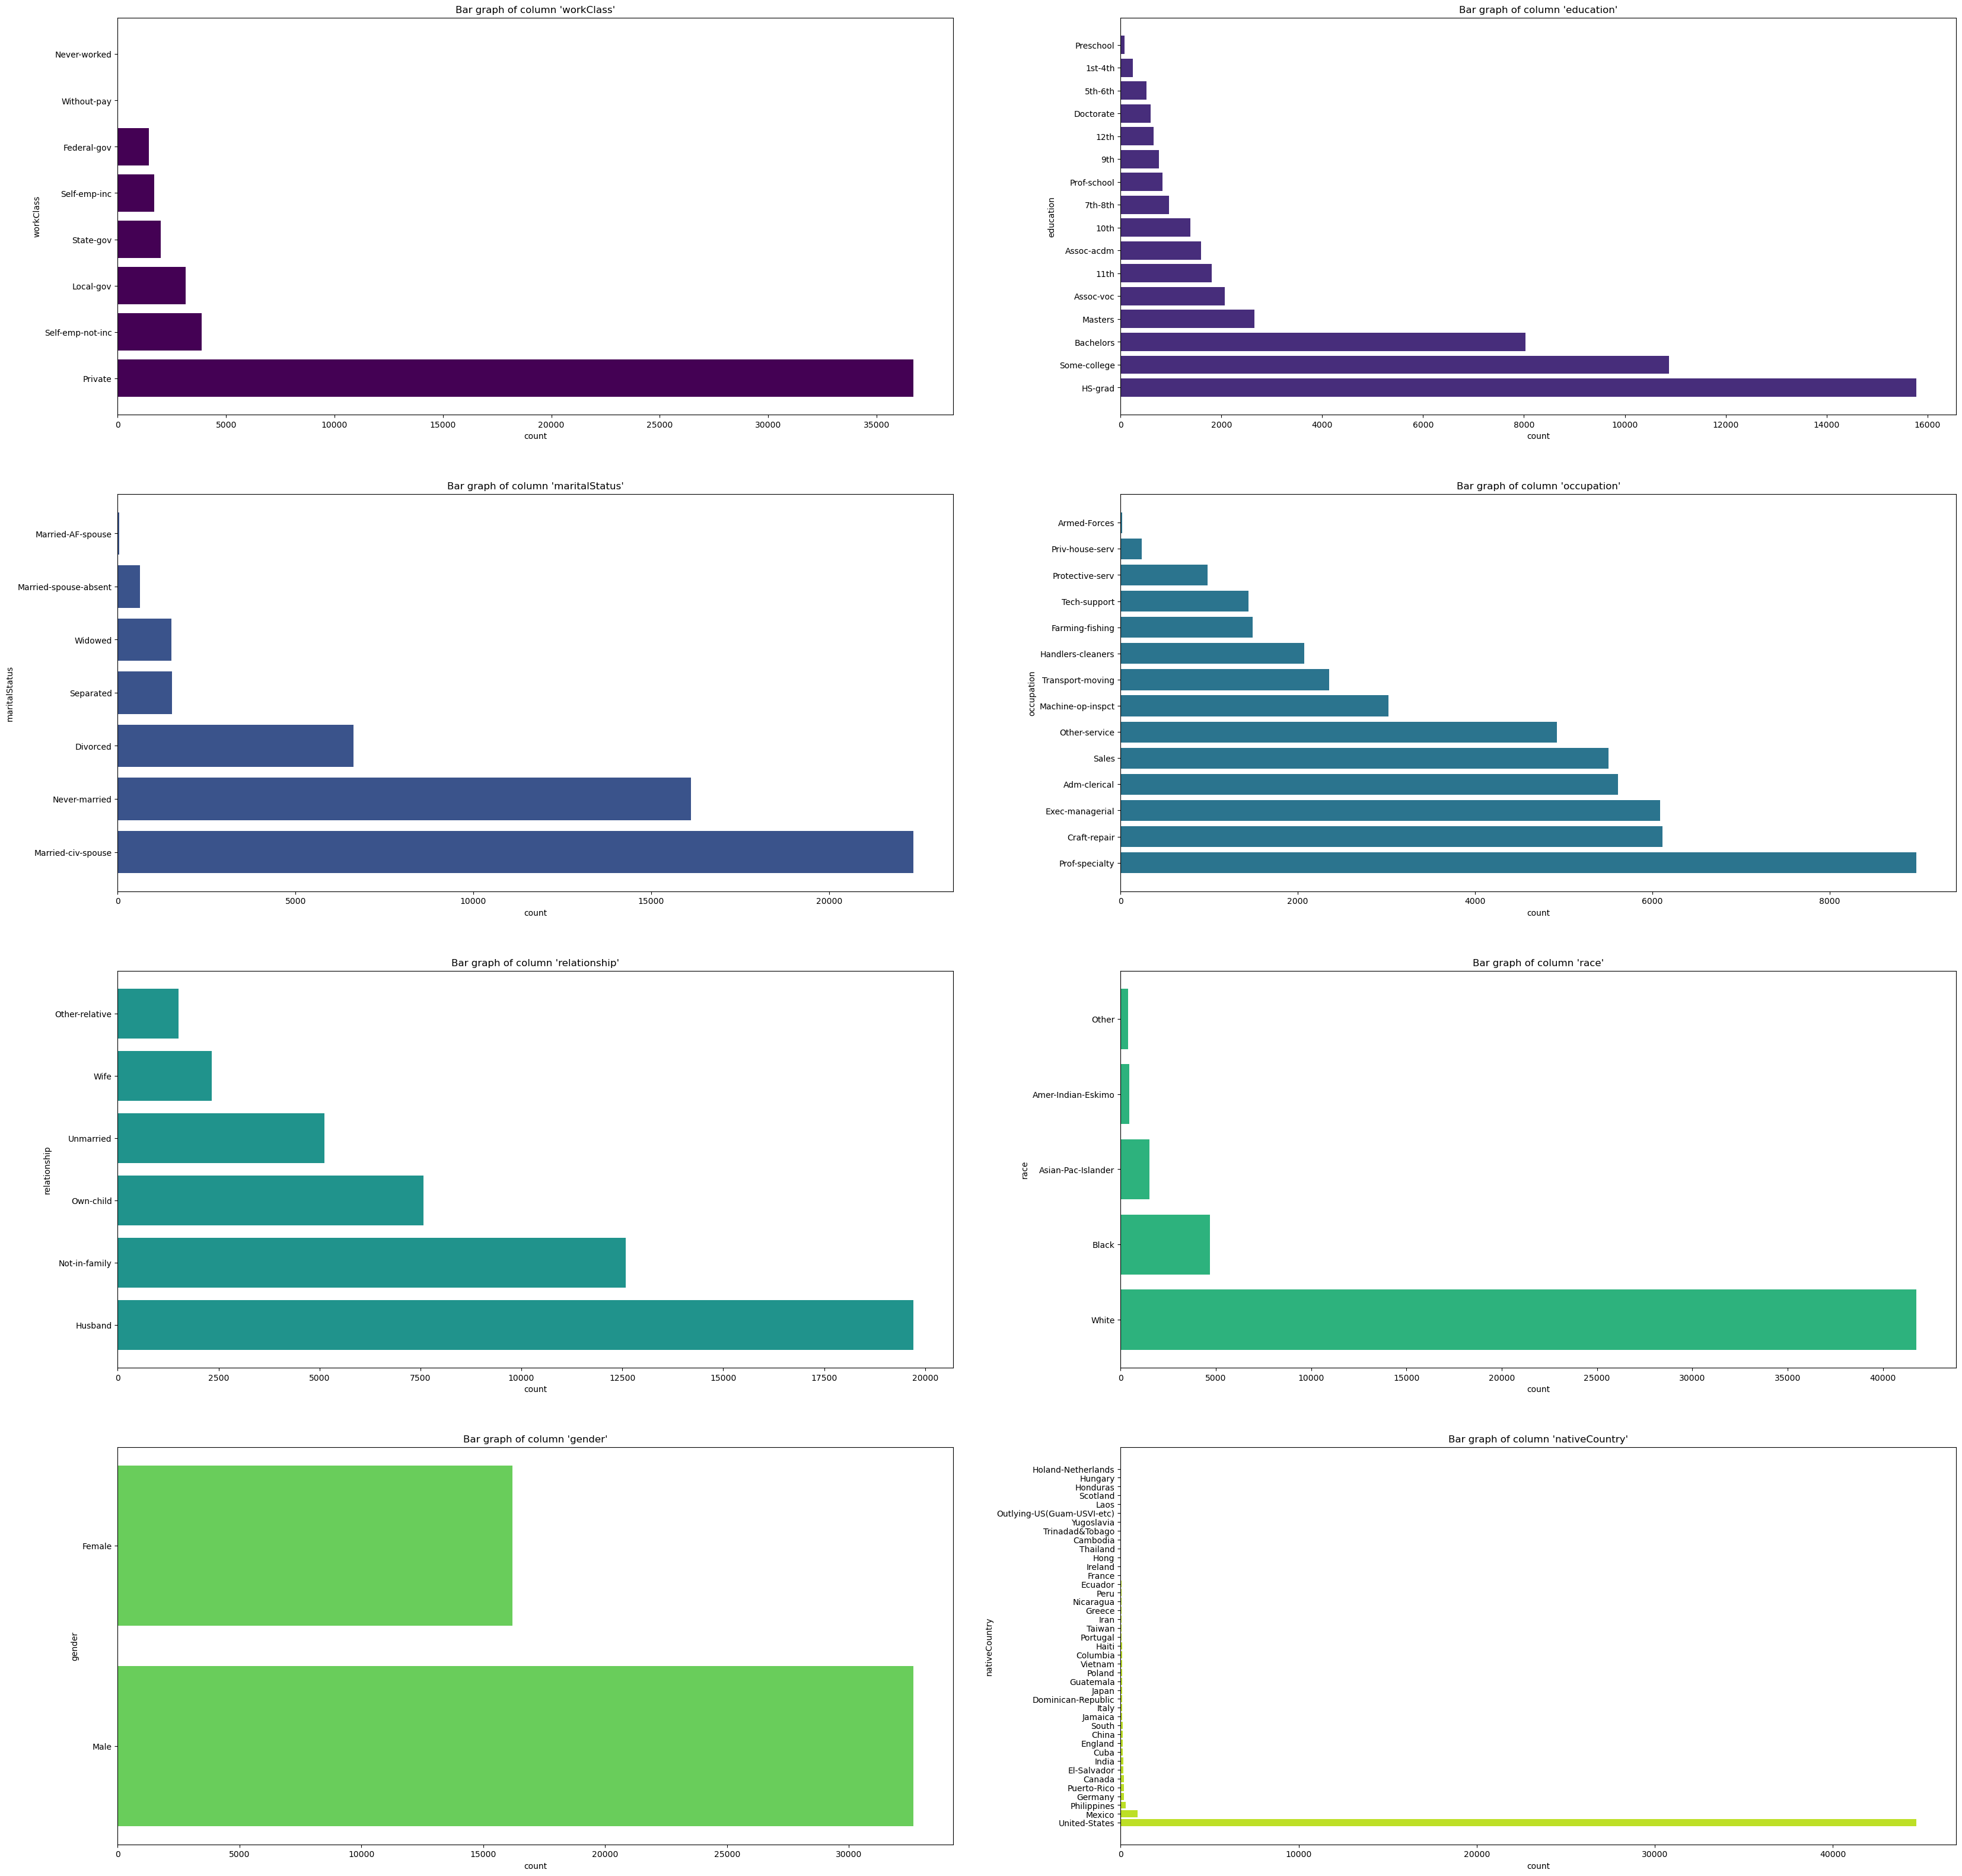

In [10]:
# the bar graphs for the categoricals
fig, axs = plt.subplots(4,2,figsize=(40,40))
cmap = mpl.colormaps['viridis'](np.linspace(0,.9,8))
x,y=0,0

for i,col in enumerate(data.select_dtypes(include='object').columns[:-1]):
    dtemp = data[col].value_counts()
    axs[y,x].barh(y=np.arange(0,data[col].nunique()),width=dtemp.values,color=cmap[i])
    axs[y,x].set_yticks(np.arange(0,data[col].nunique()))
    axs[y,x].set_yticklabels(dtemp.index)
    axs[y,x].set_xlabel('count')
    axs[y,x].set_ylabel(col)
    axs[y,x].set_title(f'Bar graph of column \'{col}\'')
    x =(x+1)%2
    y+=(x+1)%2

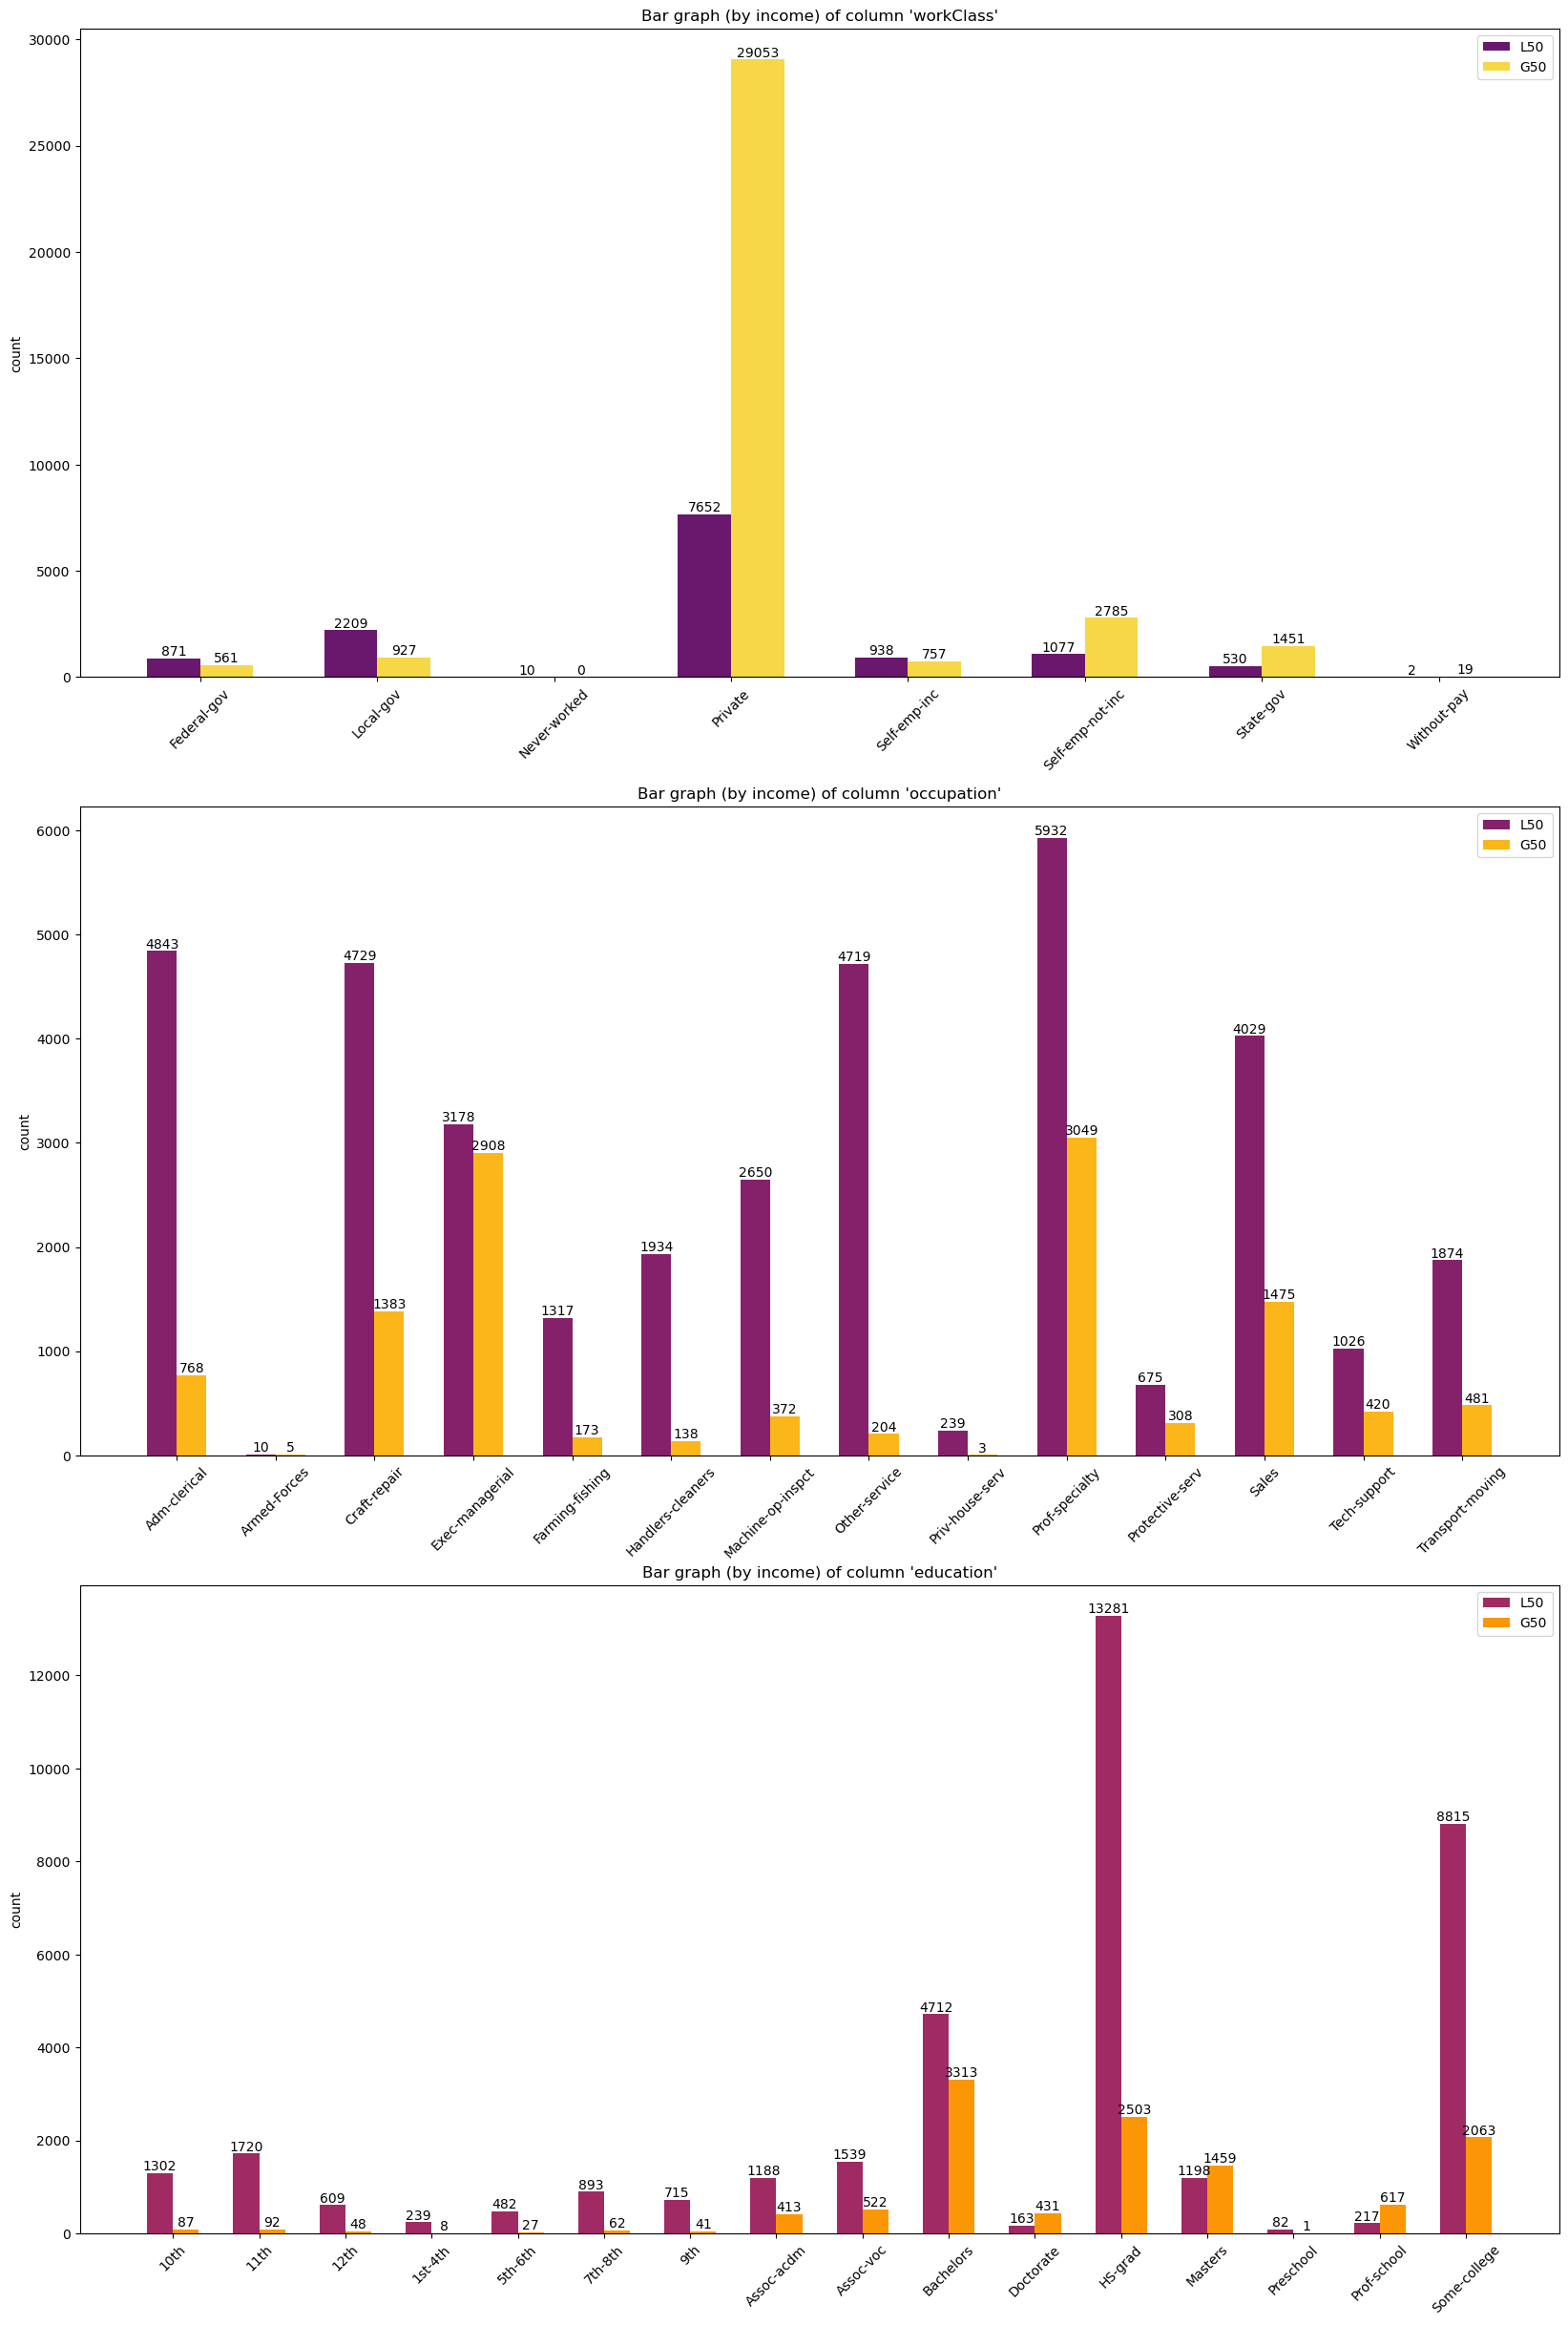

In [15]:
# bar graphs separated by income category (only for attributes considered relevant)
Axdict = plt.figure(figsize=(20,30)).subplot_mosaic(mosaic =[['A'],['B'],['C']])
axs = 'A B C'.split()
cmap = mpl.colormaps['inferno'](np.linspace(.3,.9,10))

width = 2
for i,col in enumerate(['workClass','occupation','education']):
    dtemp = data[[col,'income','gender']].groupby([col,'income']).count()
    pos = np.cumsum(np.hstack([np.array([1]),np.repeat(2,data[col].nunique()-1)]))
    
    done = dtemp.iloc[::2,0].values
    if(col=='workClass'):
        dtwo =np.insert(dtemp.iloc[1::2].values,2,0)
    else:
        dtwo = dtemp.iloc[1::2,0].values
    rects1 = Axdict[axs[i]].bar(x=pos-.3,height = done, color=cmap[i], width=.6,label='L50')
    rects2 = Axdict[axs[i]].bar(x=pos+.3,height = dtwo, color=cmap[9-i], width=.6,label='G50')
    
    Axdict[axs[i]].bar_label(rects1,done) #np.around(done/data[col].shape[0],2)*100
    Axdict[axs[i]].bar_label(rects2,dtwo) #np.around(dtwo/data[col].shape[0],2)*100
    Axdict[axs[i]].set_xticks(np.arange(1,data[col].nunique()*2,2))
    Axdict[axs[i]].set_xticklabels(dtemp.index.get_level_values(0).drop_duplicates(),rotation=45)
    
    Axdict[axs[i]].legend()
    Axdict[axs[i]].set_ylabel('count')
    Axdict[axs[i]].set_title(f'Bar graph (by income) of column \'{col}\'')
    

## Relational plots

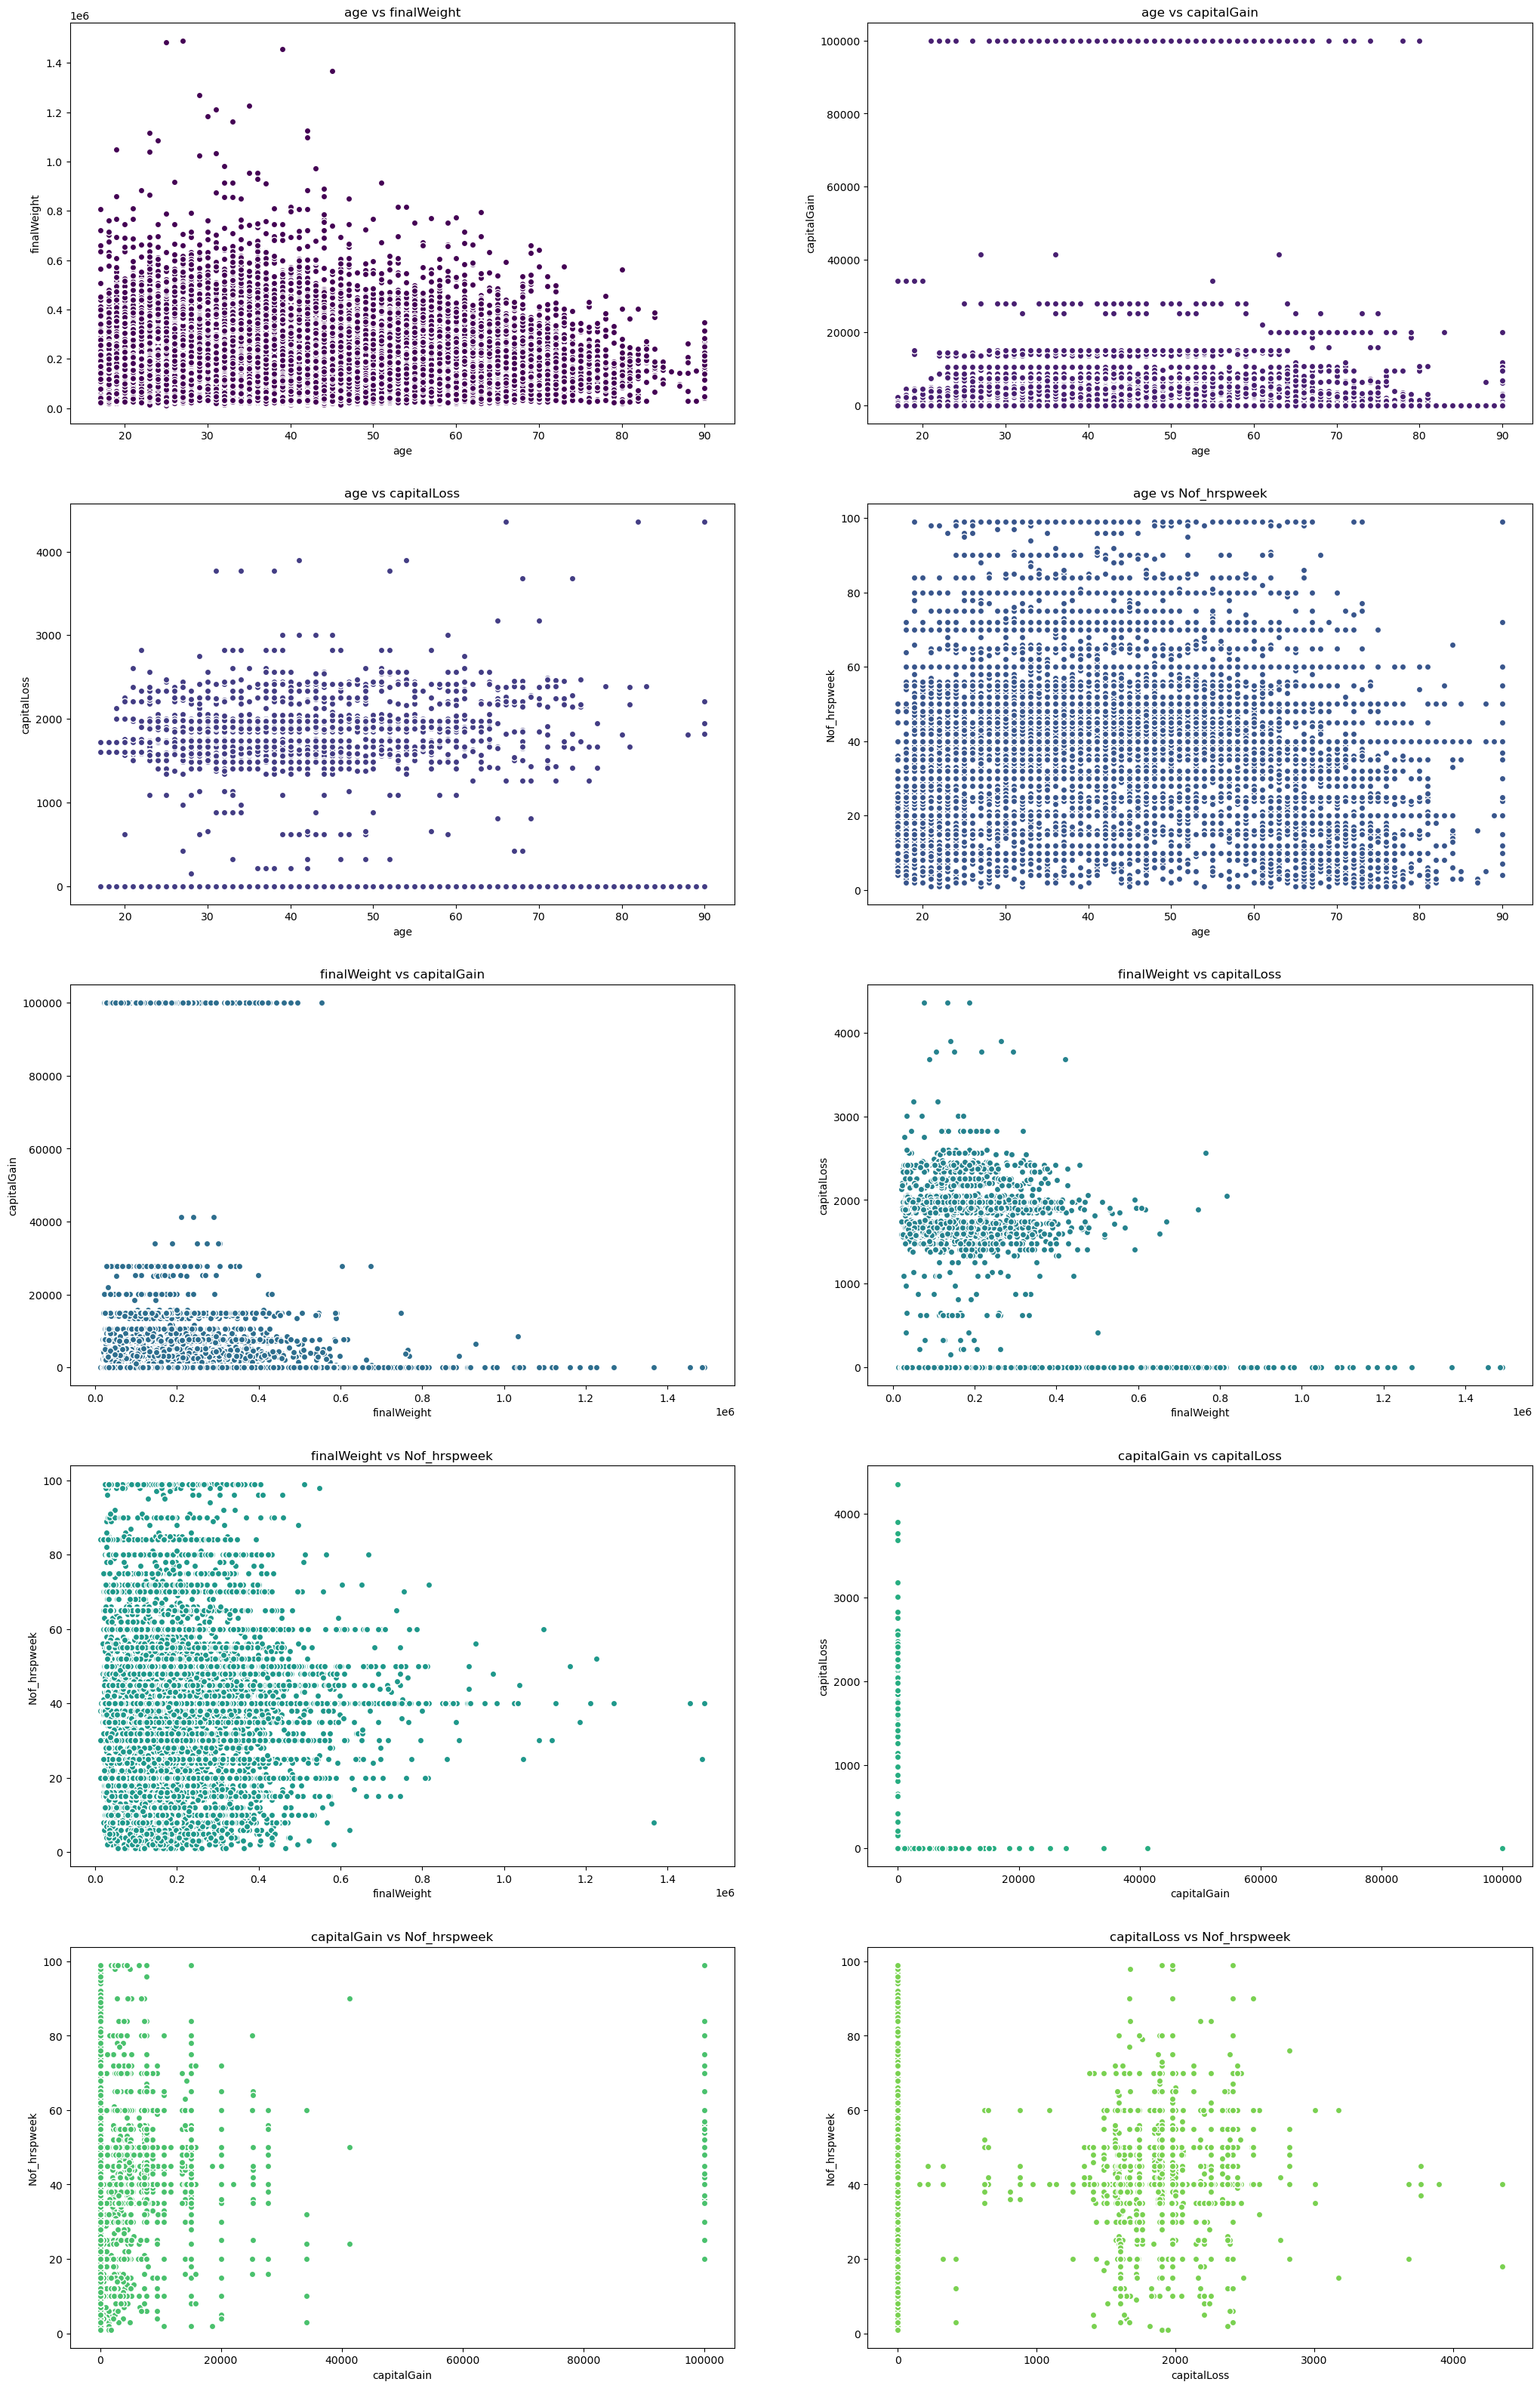

In [193]:
# numerical vs numerical
fig,axs = plt.subplots(5,2,figsize=(25,40))
color = mpl.colormaps['viridis'](np.linspace(0,.8,10))

x,y = 0, 0
for i,(p1,p2) in enumerate(combinations(data.select_dtypes(np.number).columns,2)):
    axs[x,y].plot(data[p1],data[p2],ls='',marker='o',markerfacecolor=color[i],markeredgecolor='w')
    axs[x,y].set_xlabel(p1)
    axs[x,y].set_ylabel(p2)
    axs[x,y].set_title(f'{p1} vs {p2}')
    y=(y+1)%2
    x+=(y+1)%2
    
plt.show()

* In the plots above, we can see that both gain and loss are greater than, or equal to, zero
* So if the gain is zero, then loss can be zero or higher
* Converserly, if the loss is zero, gain can be zero or higher

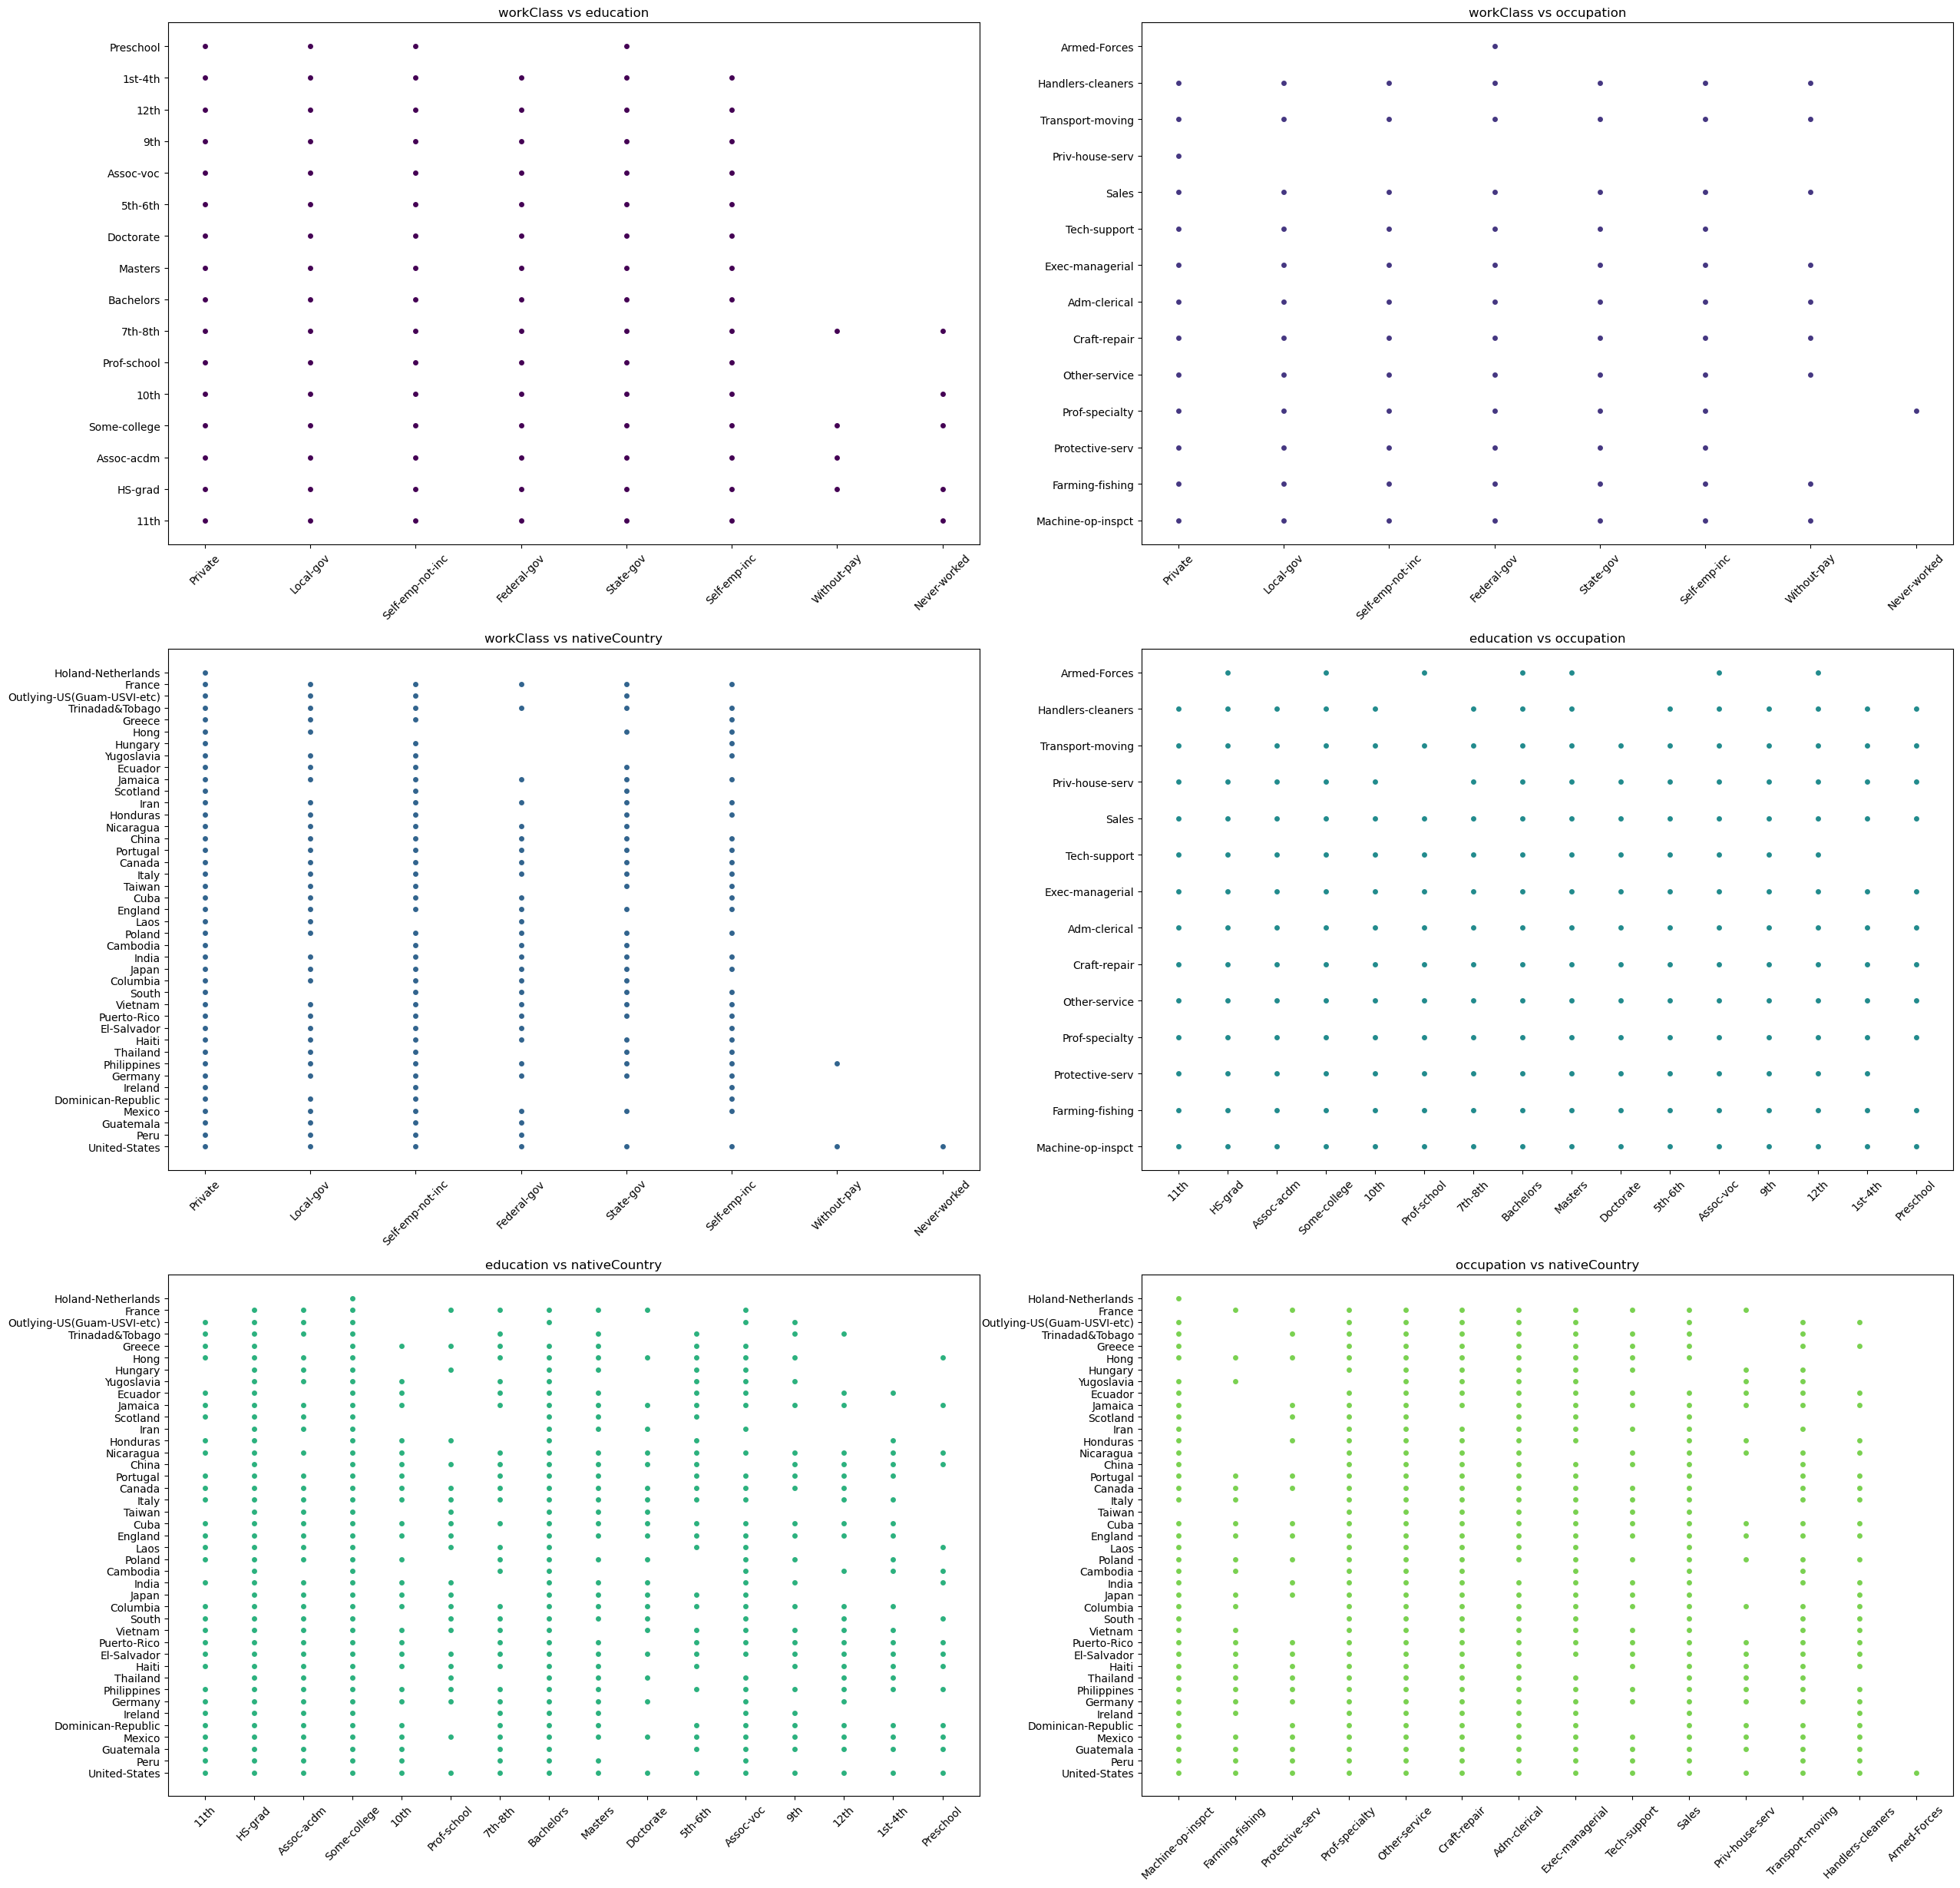

In [213]:
# categorical vs categorical
fig,axs = plt.subplots(3,2,figsize=(30,30))
color = mpl.colormaps['viridis'](np.linspace(0,.8,6))

x,y = 0, 0
for i,(p1,p2) in enumerate(combinations(['workClass','education','occupation','nativeCountry'],2)):
    axs[x,y].plot(data[p1],data[p2],ls='',marker='o',markerfacecolor=color[i],markeredgecolor='w')
    
    axs[x,y].set_xticks(np.arange(data[p1].nunique()))
    axs[x,y].set_yticks(np.arange(data[p2].nunique()))
    
    axs[x,y].set_yticklabels(data[p2].unique())
    axs[x,y].set_xticklabels(data[p1].unique(),rotation=45)

    axs[x,y].set_title(f'{p1} vs {p2}')
    x+=(y+1)//2
    y=(y+1)%2
    
    
plt.show()

## The tests

#### test 1
- We will frame the first Hypothesis to be tested as:
    * $H_o$: there is no difference in the mean ages of the two income groups
    * $H_1$: there is some difference in the mean ages of the two income groups

In [268]:
# we will filter out any data that is more than 3 standard deviations away from the normalized age values
data = data[(np.abs(stats.zscore(data['age']))<3)]
rng = np.random.default_rng(12345679)

L50 = data[data.income=='<=50K']['age']
M50 = data[data.income=='>50K']['age']

# sampling 100 values from the L50
L50 = L50.to_numpy()
L50s = rng.choice(L50,100)

# doing the same from the M50
M50 = M50.to_numpy()
M50s = rng.choice(M50,100)

# doing the actual t-test
ttest,pval = ttest_ind(M50s,L50s,equal_var=False)
if pval>.05:
    print('accept Null Hypothesis')
else:
    print('reject Null hypothesis')

reject Null hypothesis


#### Test 2: The Chi-Square test
- We will frame the Hypothesis to be tested as:
    * $H_o$: there is no relationship b/w workClass and income
    * $H_1$: there is some relatioship b/w workClass and income

In [31]:
# creating the contingency table
c_t = pd.crosstab(data['workClass'].sample(frac=.002,replace=True,random_state=2),data['income'].sample(frac=.002,replace=True,random_state=2))
c_t

income,<=50K,>50K
workClass,,
Federal-gov,0,1
Local-gov,4,1
Private,58,22
Self-emp-inc,0,1
Self-emp-not-inc,5,1
State-gov,5,0


In [32]:
# the actual test
stat, p, dof, expected = chi2_contingency(c_t) #Chi-square test of independence of variables in a contingency table.

print(f'The chi-square statistic is: {stat}\nThe p-value is: {p}\nThe degrees of freedom are: {dof}\nThe expected frequencies:\n {expected}')

The chi-square statistic is: 7.791488603988604
The p-value is: 0.16810768009710225
The degrees of freedom are: 5
The expected frequencies:
 [[ 0.73469388  0.26530612]
 [ 3.67346939  1.32653061]
 [58.7755102  21.2244898 ]
 [ 0.73469388  0.26530612]
 [ 4.40816327  1.59183673]
 [ 3.67346939  1.32653061]]


In [33]:
# we will now calcualte the chi-square statistic for 5% sureity of no-correlation
prob= .95
critical = chi2.ppf(prob,dof)

In [34]:
# We will now decide if H_0 is accepted or rejected
if abs(stat) >= critical:
    print('values are dependent, ruling out the Null Hypothesis as improbable')
else:
    print('values are independent, Null hypothesis is accepted')

values are independent, Null hypothesis is accepted


## Multivariate Analysis

<Axes: >

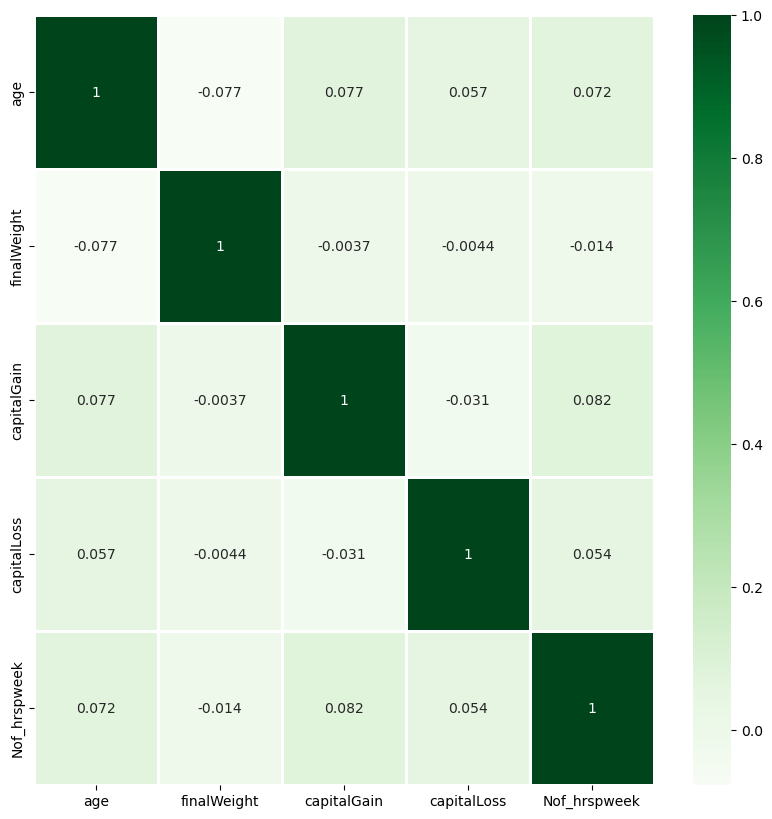

In [37]:
# heatmap between the numerical vars
plt.subplots(figsize=(10,10))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True,cmap='Greens',linewidth=2)

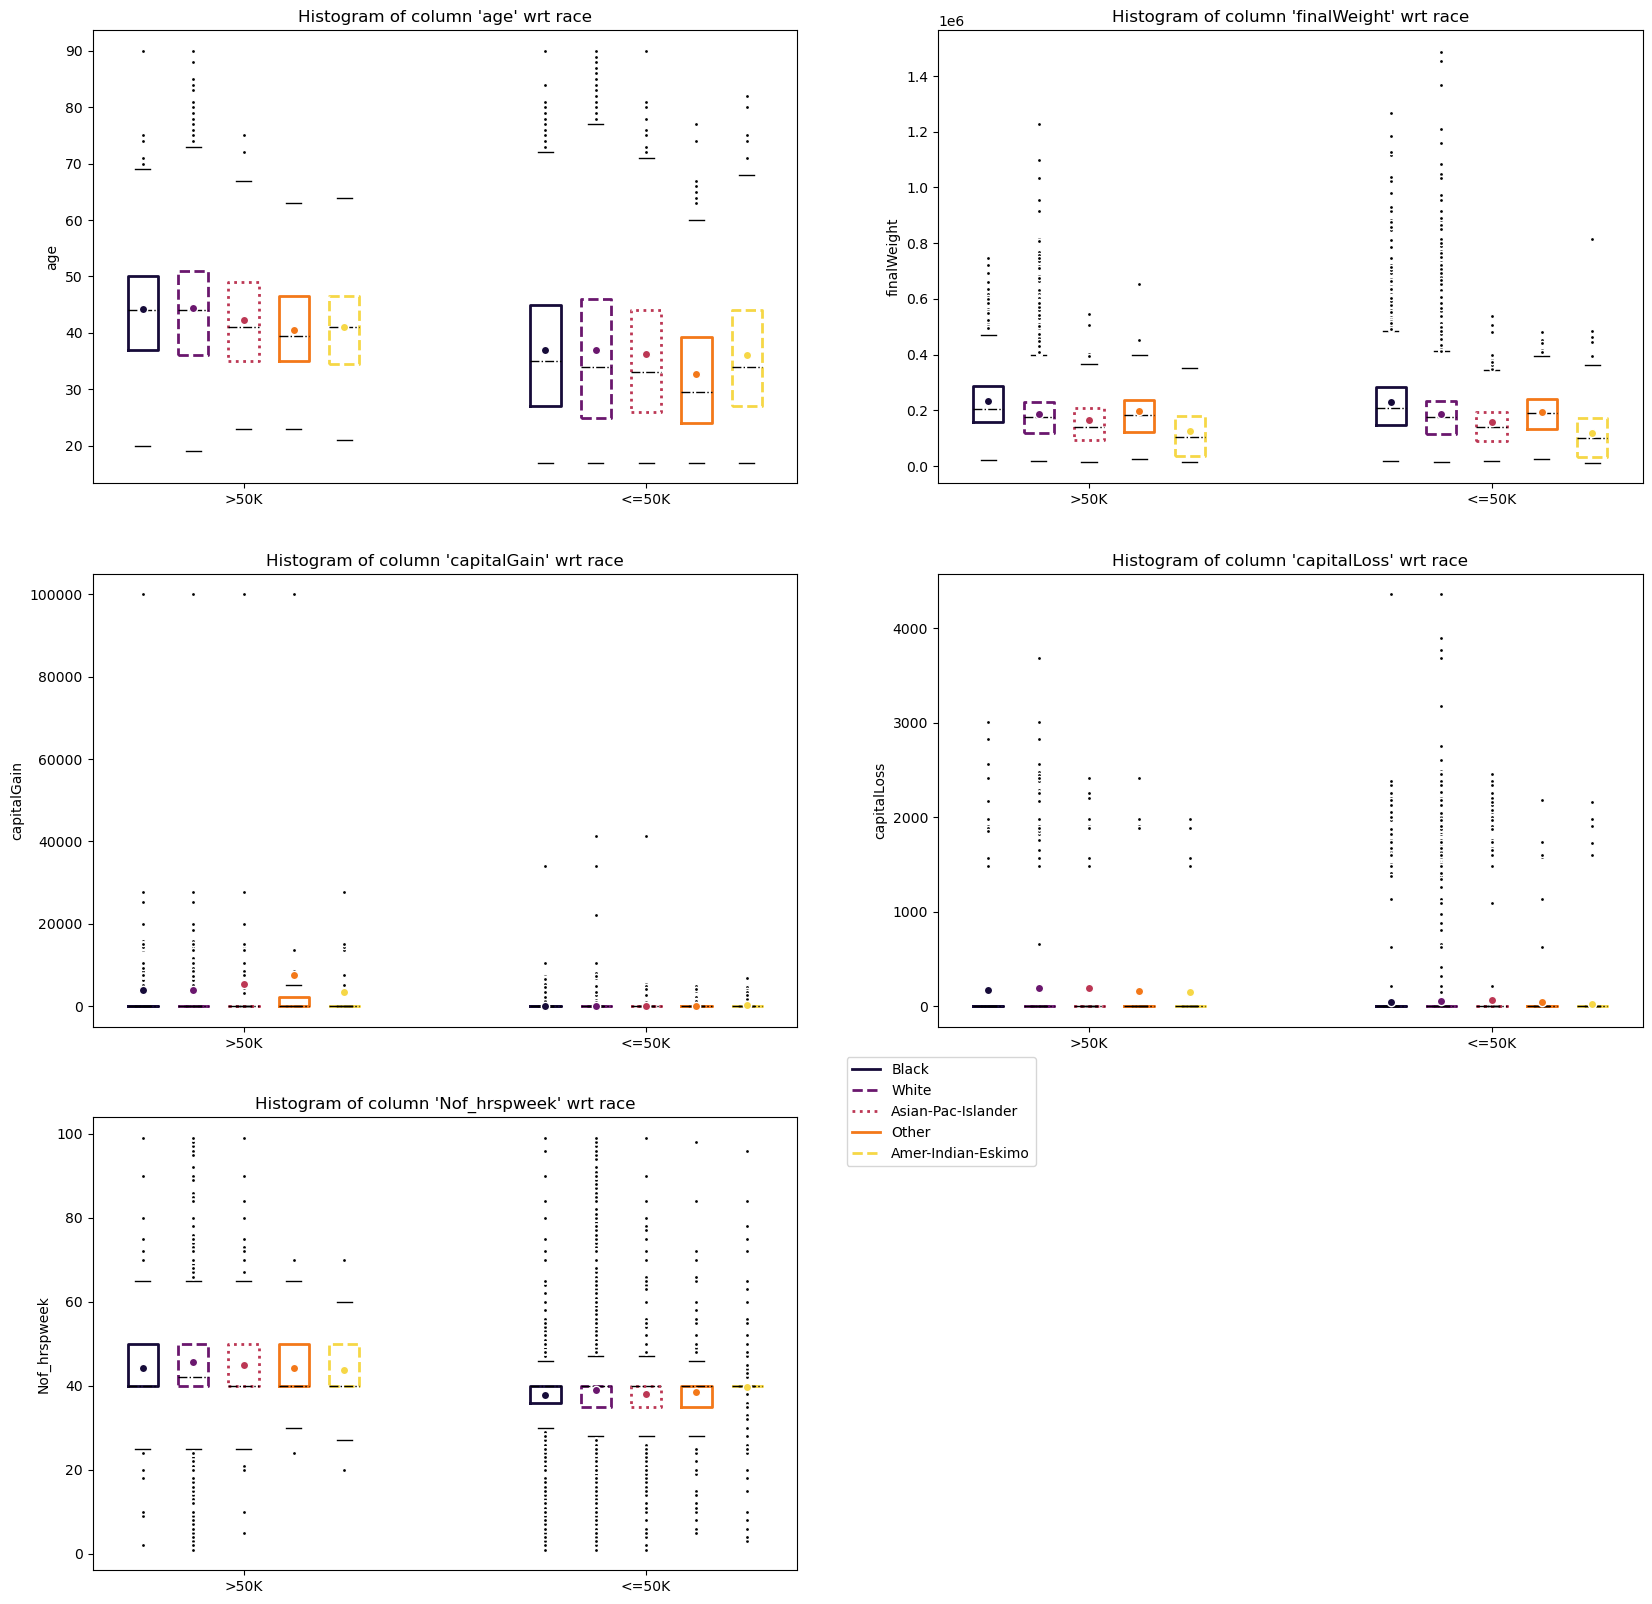

In [115]:
# histograms for numerical attributes

fig,Axdict = plt.subplot_mosaic(mosaic =[['A','B'],['C','D'],['E','.']],figsize=(20,20))
axs = 'A B C D E'.split()

catcol ='race'
categories = data[catcol].unique()
ncat = data[catcol].nunique()

cmap = mpl.colormaps['inferno'](np.linspace(.1,.9,ncat))
ls = ['-', '--', ':','-', '--', ':','-', '--', ':','-', '--', ':','-', '--', ':']
width=.5

if ncat%2==0:
    start=1-((width/2)*(2*(ncat//2)-1))
else:
    start=1-(ncat//2)*width
    
for i,col in enumerate(data.select_dtypes(include=np.number).columns):
    
    bp= OrderedDict()
    
    for j,cat in enumerate(categories):
        CG50 = data[(data.income=='>50K') & (data[catcol]==cat)].loc[:,col].values
        CL50 = data[(data.income=='<=50K') & (data[catcol]==cat)].loc[:,col].values
        
       

        bp[cat] = Axdict[axs[i]].boxplot([CG50,CL50],positions=[start+width*j,start+np.ceil(ncat*width+1)+width*j],
                               boxprops=dict(ls=ls[j],c=cmap[j],lw=2),
                               medianprops=dict(ls='-.',lw=1,c='k'),
                               meanprops=dict(marker='o',markerfacecolor=cmap[j],markeredgecolor='w'),
                               flierprops=dict(marker='.',markeredgecolor='w',markerfacecolor='k'),
                               whiskerprops=dict(ls=''),
                               widths=.3,showmeans=True,meanline=False)


    Axdict[axs[i]].set_ylabel(col)
    Axdict[axs[i]].set_xticks([1,np.ceil(ncat*width+1)+1])
    Axdict[axs[i]].set_xticklabels(['>50K','<=50K'])
    

    
    Axdict[axs[i]].set_title(f'Histogram of column \'{col}\' wrt {catcol}')
fig.legend([bps['boxes'][0] for bps in [bp[cat2] for cat2 in categories]],categories,bbox_to_anchor=(.6,.37))
plt.show()

## making new variables

In [163]:
data['capitalChange'] = data['capitalGain']-data['capitalLoss']
data['capitalChange'].describe()

count    48842.000000
mean       991.565313
std       7475.549906
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capitalChange, dtype: float64

Text(0.5, 1.0, 'capitalChange plot')

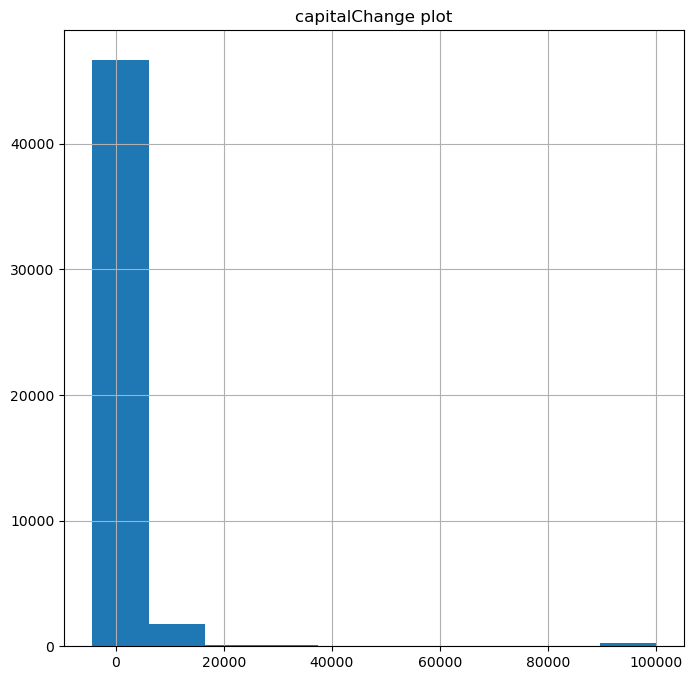

In [118]:
data['capitalChange'].hist(figsize=(8,8))
plt.title('capitalChange plot')

### Framing a test:
We will frame a test as:
- $H_0$: there is no difference in mean of income group >50K and income group <=50K
- $H_1$: there is difference in mean of income group >50K and income group <=50K

In [136]:
InG50 = data[data.income=='>50K'].loc[:,'capitalChange'].values
InL50 = data[data.income=='<=50K'].loc[:,'capitalChange'].values

# data = data[(np.abs(stats.zscore(data['age']))<3)]

#rng
rng = np.random.default_rng()

#we will now sample the two classes
InGs = rng.choice(InG50,50)
InLs = rng.choice(InL50,50)

In [137]:
# here we will conduct the t-test of independence
ttest, pval = ttest_ind(InGs,InLs,equal_var=0)
print(f'The t-test statistic is: {ttest}\nThe obtained p-value is: {pval}')

The t-test statistic is: 1.2313850555412418
The obtained p-value is: 0.22393268178356446


In [139]:
# We will now decide if H_0 is accepted or rejected
if pval <= .05:
    print('the capitalGain means are different, reject Null Hypothesis')
else:
    print('The capitalGain means for the income groups are the same, failed to reject Null hypothesis')

The capitalGain means for the income groups are the same, failed to reject Null hypothesis


## Feature Selection

In [160]:
# label encoding the binary categoricals
bincols = [col for col,val in data.nunique().items() if val==2 ]

dofd = {col:{Cat:i for i,Cat in enumerate(data[col].unique())} for col in bincols}
rdofd = {col:{i:cat for cat,i in dofd[col].items()} for col in dofd.keys()}

data.replace(dofd,inplace=True)
data.head()

,age,workClass,finalWeight,education,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,Nof_hrspweek,nativeCountry,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,White,1,0,0,30,United-States,0


In [161]:
# creating the 'married' data column
data['maritalStatus'].replace(['Never-married','Divorced','Separated','Widowed'],'single',inplace=True)
data['maritalStatus'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'married',inplace=True)

data['maritalStatus'].replace({'single':0,'married':1},inplace=True)
data.head()

,age,workClass,finalWeight,education,maritalStatus,occupation,relationship,race,gender,capitalGain,capitalLoss,Nof_hrspweek,nativeCountry,income
0,25,Private,226802,11th,0,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,1,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,1,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,1,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,Private,103497,Some-college,0,Prof-specialty,Own-child,White,1,0,0,30,United-States,0


In [164]:
# dropping unnecessary data
data.drop(columns=['workClass','education','occupation','race','relationship','nativeCountry','capitalChange'],inplace=True)
data.head()

,age,finalWeight,maritalStatus,gender,capitalGain,capitalLoss,Nof_hrspweek,income
0,25,226802,0,0,0,0,40,0
1,38,89814,1,0,0,0,50,0
2,28,336951,1,0,0,0,40,1
3,44,160323,1,0,7688,0,40,1
4,18,103497,0,1,0,0,30,0


## Model Building 

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score,KFold,learning_curve,train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [175]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

num_folds = 10

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

### Model building/evaluation

In [184]:
max_trees =100
max_features = 3

#spot check 4 algorithms (LR,KNN, CART, GNB, RFC)
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier(n_estimators=max_trees,max_features=max_features,random_state=42)))

In [185]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'name: {name}, mean of results: {cv_results.mean()}, Std Deviation of results: {cv_results.std()}',end='\n')

name: LR, mean of results: 0.7949221262311904, Std Deviation of results: 0.008066657858731827
name: KNN, mean of results: 0.7735520307224861, Std Deviation of results: 0.006339211776717297
name: CART, mean of results: 0.7865788159666179, Std Deviation of results: 0.006339638295145838
name: NB, mean of results: 0.792004574630371, Std Deviation of results: 0.007266471495814146
name: RFC, mean of results: 0.8096639459553346, Std Deviation of results: 0.007724826354065086


In [186]:
# a RF instance
RF = RandomForestClassifier(n_estimators=250,max_features=5)
RF.fit(X_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=250)

In [188]:
#predicting using the RF
y_pred = RF.predict(X_test)
print(f'The accuracy of the model is: {100*accuracy_score(y_test,y_pred)}')

The accuracy of the model is: 81.21609171870202


<Axes: >

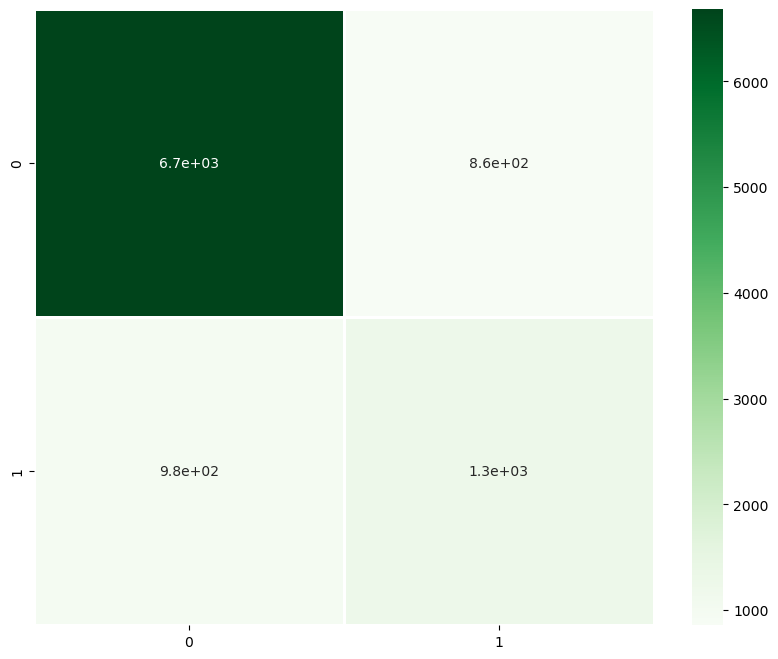

In [190]:
# the confusion matrix
plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidth=2,cmap='Greens')

In [192]:
# the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7539
           1       0.59      0.56      0.58      2230

    accuracy                           0.81      9769
   macro avg       0.73      0.72      0.73      9769
weighted avg       0.81      0.81      0.81      9769



### Tuning the Parameters

In [195]:
RFC = RandomForestClassifier()
folds = 4
params = dict(n_estimators = np.arange(200,501,50),max_features=np.arange(2,7,2))
TuneRFC = GridSearchCV(RFC, params, scoring='accuracy',cv=folds,verbose=2)

#training the grid
TuneRFC.fit(X_train,y_train)

Fitting 4 folds for each of 21 candidates, totalling 84 fits
[CV] END ...................max_features=2, n_estimators=200; total time=   7.4s
[CV] END ...................max_features=2, n_estimators=200; total time=   7.4s
[CV] END ...................max_features=2, n_estimators=200; total time=   7.2s
[CV] END ...................max_features=2, n_estimators=200; total time=   7.4s
[CV] END ...................max_features=2, n_estimators=250; total time=   9.7s
[CV] END ...................max_features=2, n_estimators=250; total time=   9.6s
[CV] END ...................max_features=2, n_estimators=250; total time=   8.8s
[CV] END ...................max_features=2, n_estimators=250; total time=   9.3s
[CV] END ...................max_features=2, n_estimators=300; total time=  11.0s
[CV] END ...................max_features=2, n_estimators=300; total time=  10.6s
[CV] END ...................max_features=2, n_estimators=300; total time=  10.7s
[CV] END ...................max_features=2, n_es

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([2, 4, 6]),
                         'n_estimators': array([200, 250, 300, 350, 400, 450, 500])},
             scoring='accuracy', verbose=2)

In [197]:
TuneRFC.best_params_

{'max_features': 6, 'n_estimators': 350}

In [199]:
# predicting using the best parameters
y_Tpred= TuneRFC.predict(X_test)
print(f'The accuracy of the best params model is: {100*accuracy_score(y_test,y_Tpred)}')

The accuracy of the best params model is: 81.19561879414474
